In [1]:
# import pandas and numpy for data wrangling
import numpy as np
import pandas as pd

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# statistical tools (more packages install in the notebook)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


# 0. Importing data and removing duplicates

In [2]:
# Define dataset as df
df= pd.read_csv('bank-data.csv',sep=';')

In [3]:
# drop duplicate rows
df.drop_duplicates();

In [4]:
# first view of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 1. Data Exploration and Preprocessing

### 1.1. Data types and data completeness 

Review data set: null values were originally coded as "unknown". In order to review null values we replaced "unkown" with null.

In [5]:
# review missing values using "unkown" value
df_missing =df.replace('unknown',np.NaN)
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# missing values
val_mis = df_missing.isnull().sum()

# percentage of missing values
val_mis_percent = 100 * df_missing.isnull().sum() / len(df)

# table of missing values
val_table_missing = pd.concat([val_mis, val_mis_percent], axis=1)
val_table_missing = val_table_missing.rename(
        columns = {0 : 'Values Missing', 1 : '% of Total Values'})
val_table_missing =val_table_missing.sort_values(by ='% of Total Values', ascending = False ).round(1)
val_table_missing

,Values Missing,% of Total Values
default,8597,20.9
education,1731,4.2
housing,990,2.4
loan,990,2.4
job,330,0.8
marital,80,0.2
age,0,0.0
poutcome,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0


In [7]:
# Data types count
df.dtypes.value_counts()

object     11
float64     5
int64       5
dtype: int64

Now we can pull the following information from our dataset :
>- We have twenty variables: __10 categorical variables__ and __10 numerical variables__ 
>- One output attribute __binary variable__
>- We have __missing values__ in 6 variables none of them have a high percentage of missing values, therefore all of them could be useful for the model (no column drop needed). We will analyze attribute by attribute the best way to handdle missing  values after looking at the summary statistics and the Visualization Exploratory Data Analaysis

### 1.2.  Summary Statistics

General view of the variables provided. The following analysis was separated on the numerical variables and the categorical variables

>- Numerical data:

In [8]:
df.describe(exclude=[object])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Highlights:
>- Clients are mostly middle age
>- Average contact last 3 minutes
>- People are contacted around 2 times during the campaign
>- Most people were not contacted on previous campaigns. By looking at pdays it is clear that most values are 999 days (meaning no previous campaign)
>- Duration variable appears to include a few outliers, given that the max is 81 minutes, a totally improbable lenght for a call of this type. We will analyze this further using visualizations


In [9]:
df.describe(exclude=[np.number])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Highlights:
>- Most typical job: administration; Education: university.degree
>- Clients are in majority married have a house and haven't defaulted on their loan

Before doing any feature engineering or making decisions regarding variable selection. It is important to reach a
deeper understanding of the data. In order to do this we did a Visual Exploratory Data Analysis.

### 1.3.  Visual Exploratory Data Analysis

#### 1.3.1 Visualizating the output variable

In [10]:
# transform subscription variable into binary
df['y'] = df['y'] == 'yes'

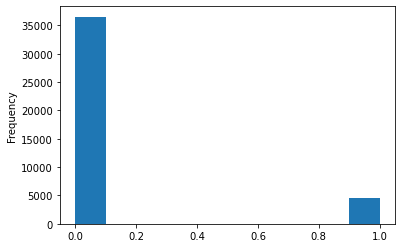

In [11]:
df['y'].astype(int).plot.hist();

The problem is an  imbalance classification problem. The campaign is only around 10% successfull.

#### 1.3.2 Numeric Variables

To obtain a better understanding of the values. We plotted each of them separetly. First the numeric values. (Ploting the data distribution)

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


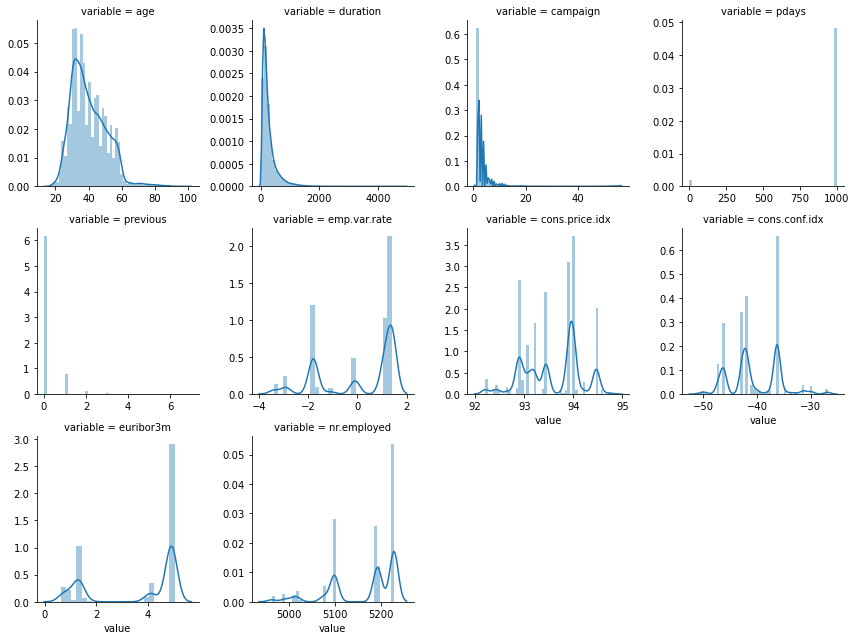

In [12]:
df_plot = pd.DataFrame(data=df, columns=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                                         'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])

nd = pd.melt(df_plot, value_vars =df_plot )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1;

The previous plots provide a better understanding of the campaign and customers. We have a customer base that is young adults and middle age people.Most duration calls have a very narrow time  around 3 min
with a very few outliers and many very short calls, we will look more into this in a boxplot. Looking at the pdays plot, clearly most customers weren't contacted in
a previous campaign. 


#### 1.3.3 Outliers in duration column

([<matplotlib.axis.XTick at 0x14a29386ca0>,
 [Text(0, 0, 'Failed'), Text(0, 0, 'Subscribed')])

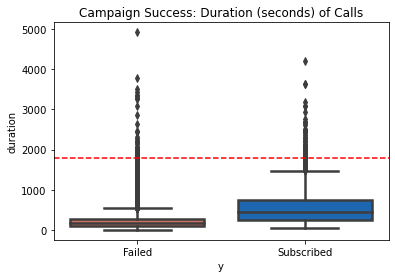

In [13]:
df2 = df[df.duration != 0]
# plt.figure(figsize=(15,10))

ax = sns.boxplot(x="y", y="duration",
                 data=df2, linewidth=2.5, palette=['#D66853',"#0466C8"])

# 30 minutes mark
ax.axhline(1800,color='red',linestyle='--')
ax.set_title("Campaign Success: Duration (seconds) of Calls")

plt.xticks([0, 1], ['Failed', 'Subscribed'])

For the successfull calls the longest call excluding outlers is 24 minutes. Most probably there is something erronous with the calls that are higher than that. (red line is 30 min)

#### 1.3.4 Categorical Variables

Plot frequencies of the categorical variables

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


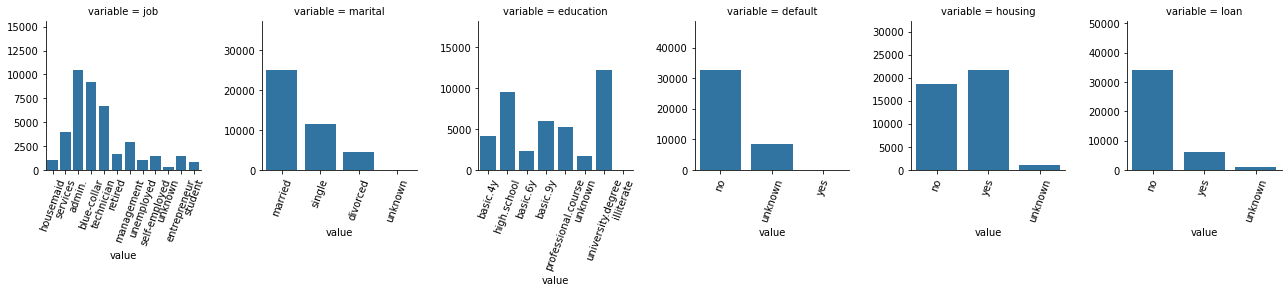

In [14]:
df_plot = pd.DataFrame(data=df, columns=['job', 'marital', 'education', 'default', 'housing','loan'])


nd = pd.melt(df_plot, value_vars =df_plot )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=6, sharex=False, sharey = False)
n1.set(xmargin=3, ymargin=0.5)
n1 = n1.map(sns.countplot, 'value')
# n1.fig.tight_layout()
for ax in n1.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(70)


Even though the category with most calls is university degree.
Most targeted customers just have highschool or lower education. 
These relates with the job distribution. Most of them work in administration roles, blue collar or technician.
Additionally, the variable default, has a considerable quantity of unkwons. Plus the "yes" are almost none.


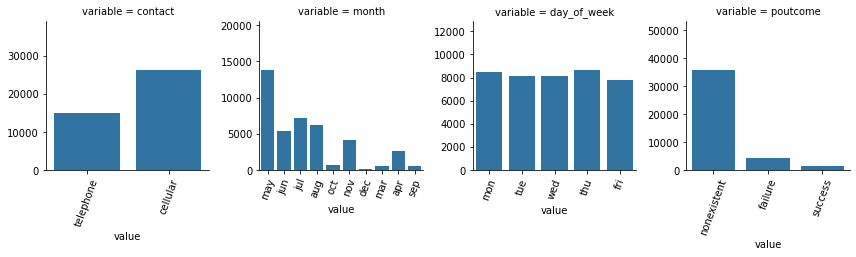

In [15]:
df_plot = pd.DataFrame(data=df, columns=['contact', 
                                         'month', 'day_of_week', 'poutcome'])

df_plot['month'] = pd.Categorical(df_plot['month'], 
  categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)

nd = pd.melt(df_plot, value_vars =df_plot )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1.set(xmargin=3, ymargin=0.5)
n1 = n1.map(sns.countplot, 'value')
# n1.fig.tight_layout()
for ax in n1.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(70)

According to the previous plost. The campaign is mostly done by cellular. Higly focus during the month of may. There
is a uniform calling pattern during the week. 

#### 1.3.5 Interactions between numerical variables

To undersand interactions we generated a correlation matrix

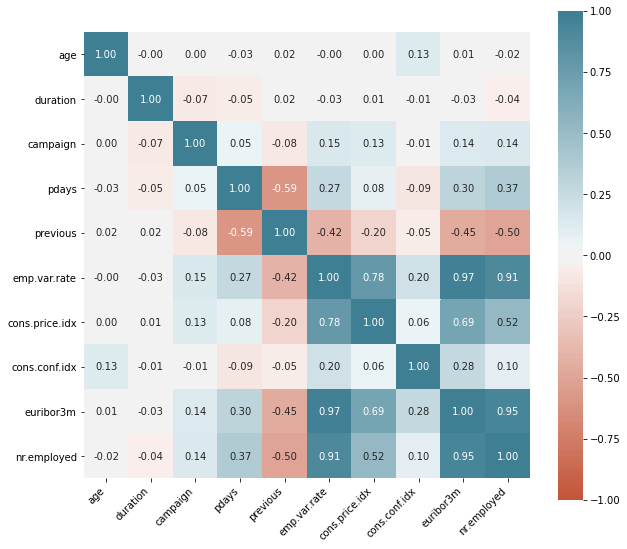

In [16]:
df_numeric = pd.DataFrame(data=df, columns=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                                         'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])

corr =  df_numeric.corr()
fig, ax = plt.subplots(figsize=(10,9)) 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot = True, fmt='.2f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Regarding the social and economic variables. There is high correlation among nr.employed, euribor3m, cons.price.idx and 
emp.var.rate. Just for improving the visualization we created a smaller correlation matrix with only economic variables:

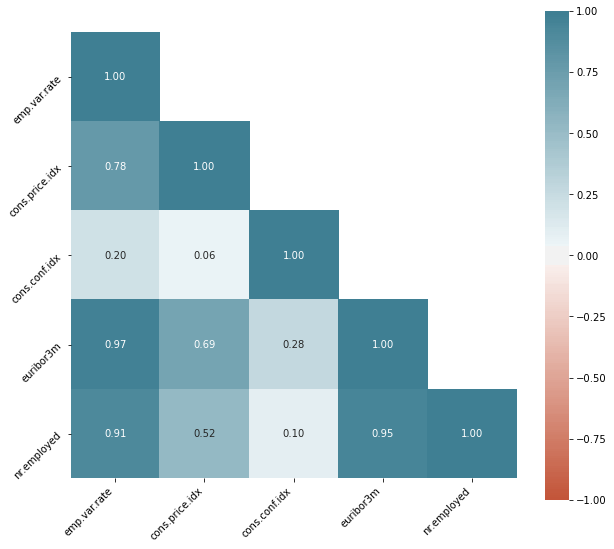

In [17]:
df_numeric = pd.DataFrame(data=df, columns=[ 'emp.var.rate',
                                         'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])
# Generate a mask for the upper triangle
corr =  df_numeric.corr()
mask = np.triu(np.ones_like(corr, dtype=bool), 1)
mask



fig, ax = plt.subplots(figsize=(10,9)) 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot = True, fmt='.2f', mask=mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,
    horizontalalignment='right'
);


#### 1.3.6 Interactions between categorical variables and output

The following code generates the frequency bar plots while adding the success percentage

In [18]:

# to generate a frequency bar chart that includes percentages I used the following code+modification:
# code use from (https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn)
def barPerc(df,xVar,ax,title):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
        ax.set_title(title)
        ax.spines['left']._adjust_location()






>- contact variable plot (contact communication type (categorical: "cellular","telephone") ):

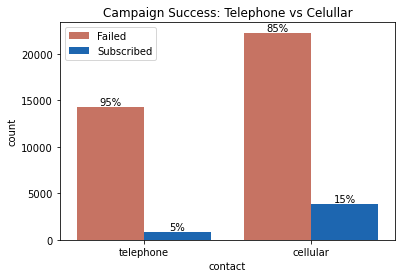

In [19]:
z = sns.countplot(x="contact", hue="y", data=df, palette=['#D66853',"#0466C8"])
z.legend(['Failed', 'Subscribed'])
barPerc(df,'contact',z,'Campaign Success: Telephone vs Celullar' )

Contacts to cellular have  better results. Marketing team should focus on acquiring cellular vs telephone.

>- previous variable plot (number of contacts performed before this campaign and for this client (numeric)):

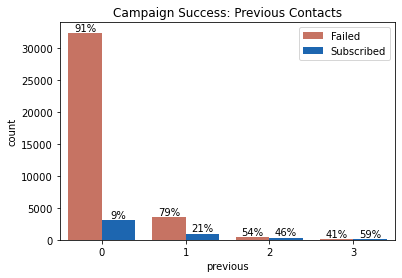

In [20]:
z = sns.countplot(x="previous", hue="y", data=df[df.previous < 4], palette=['#D66853',"#0466C8"])
z.legend(['Failed', 'Subscribed'])
barPerc(df[df.previous < 4],'previous',z,'Campaign Success: Previous Contacts' )

Previous campaigns contacts clearly affect positively the current campaign result

>- month variable plot (last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")):

In [21]:
df_temp = df
df_temp['month'] = pd.Categorical(df_temp['month'], 
  categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)


[Text(0, 0.5, 'Count (Clients Contacted)')]

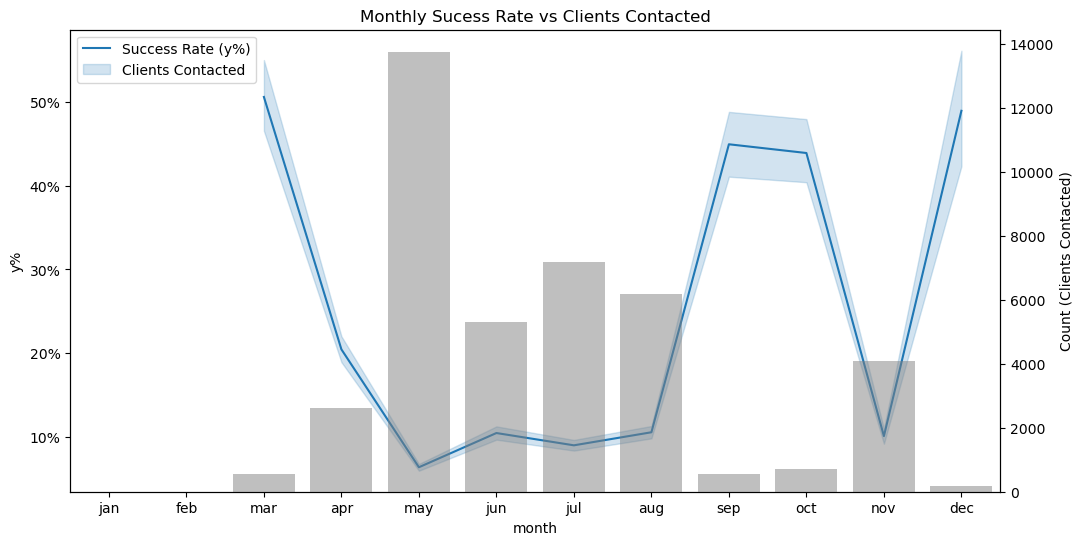

In [22]:
import matplotlib
import matplotlib.ticker as mtick

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data=df_temp, x="month", y="y",  ax=ax1)
ax2 = ax1.twinx()
ax1.legend(['Success Rate (y%)', 'Clients Contacted'], loc = 'upper left')
ax1.set( ylabel='y%')
ax1.axes.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax1.set_title('Monthly Sucess Rate vs Clients Contacted')

sns.countplot(data=df_temp, x="month",  alpha=0.5, ax=ax2, palette=['gray'])
ax2.set( ylabel='Count (Clients Contacted)')

Further analysis to reviewe differences between month. (maybe we don't have 
enough qualified leads during some months). For instance in March we have more conversion than failures.
This almost never happens in marketing campaigns.

>- day_of_week variable plot

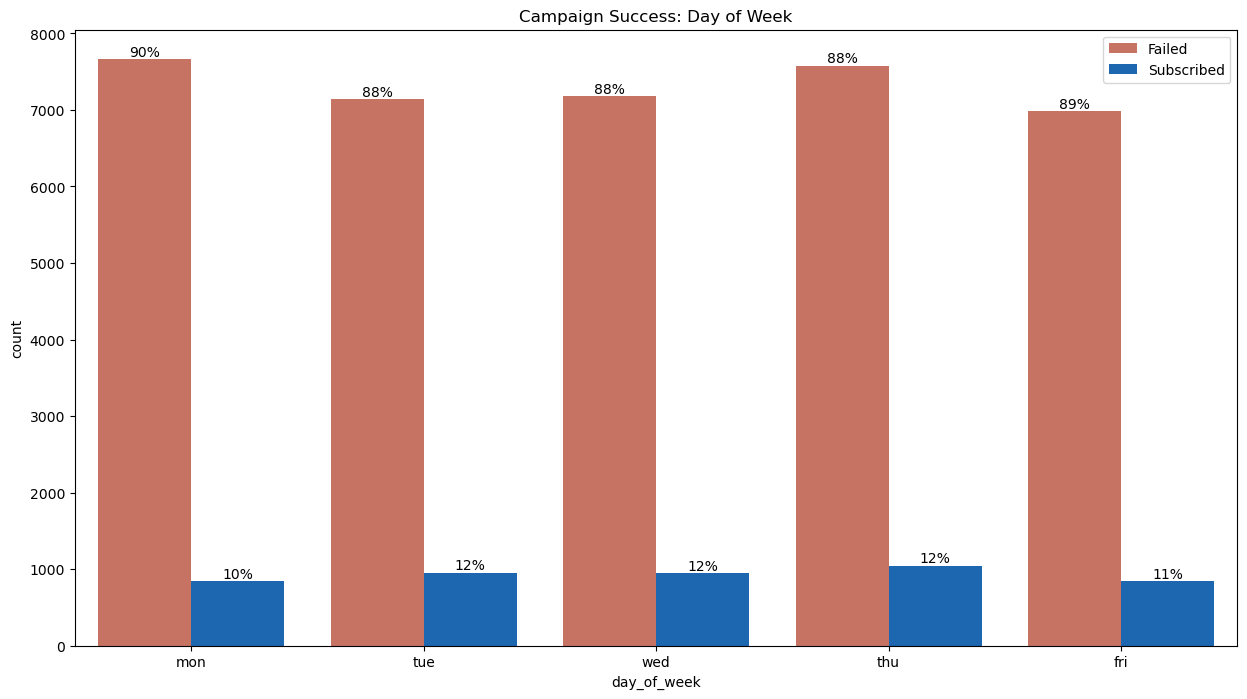

In [23]:
plt.figure(figsize=(15,8))
z = sns.countplot(x="day_of_week", hue="y", data=df, palette=['#D66853',"#0466C8"])
z.legend(['Failed', 'Subscribed'])
barPerc(df,'day_of_week',z, 'Campaign Success: Day of Week')

No significat difference related to the day of the week contacted

>- poutcome variable plot (outcome of the previous marketing campaign (categorical: "failure","nonexistent","success"))

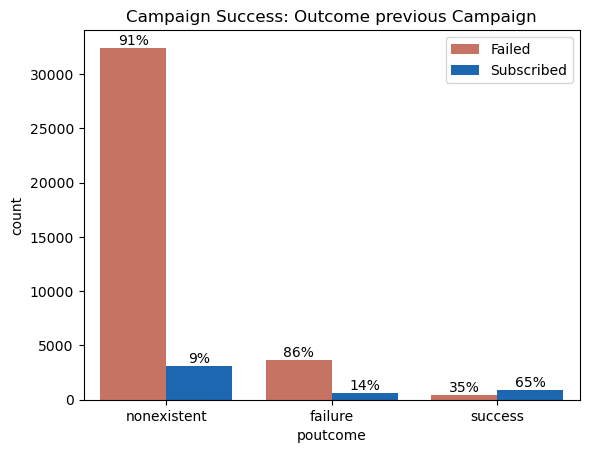

In [24]:
z = sns.countplot(x="poutcome", hue="y", data=df, palette=['#D66853',"#0466C8"])
z.legend(['Failed', 'Subscribed'])
barPerc(df,'poutcome',z, 'Campaign Success: Outcome previous Campaign')

Clearly previous marketing campaigns have an effect. Focusing on retargeting appears to be a very intersting idea. However in this sample we don't have enough clients with previous success campaign to be an important factor

>- education variable plot:

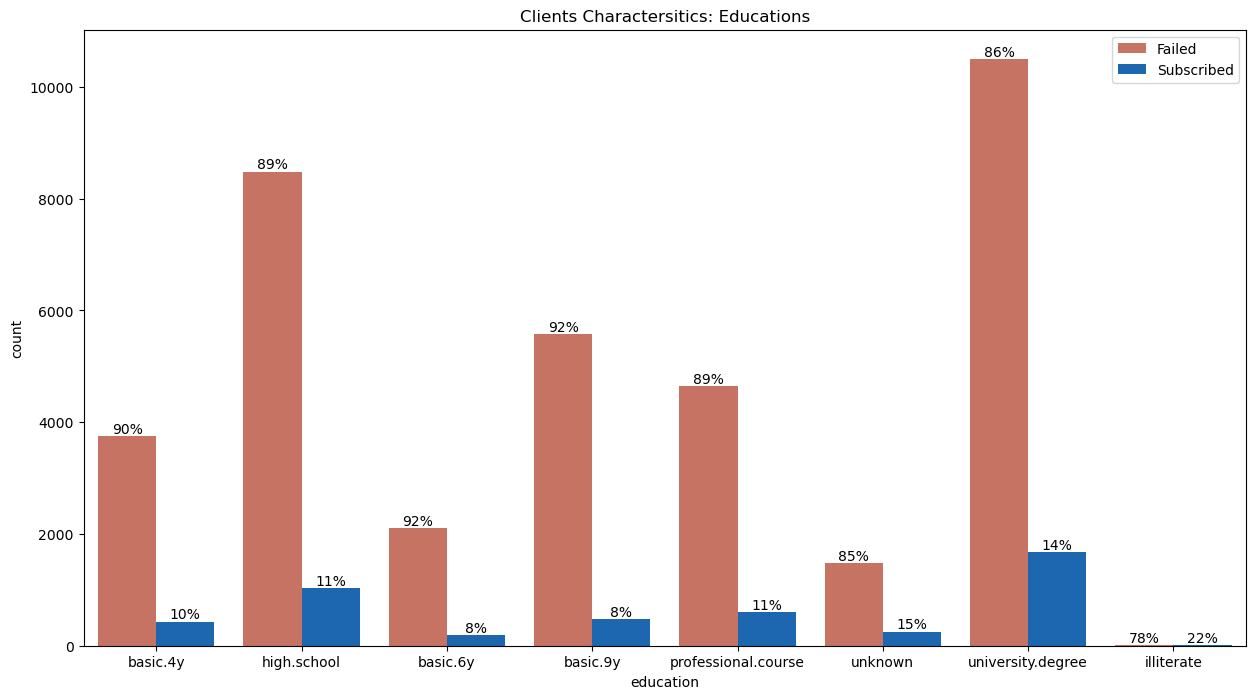

In [25]:
plt.figure(figsize=(15,8))
z = sns.countplot(x="education", hue="y", data=df, palette=['#D66853',"#0466C8"])
z.legend(['Failed', 'Subscribed'])
barPerc(df,'education',z,"Clients Charactersitics: Educations" )

>- job variable plot:

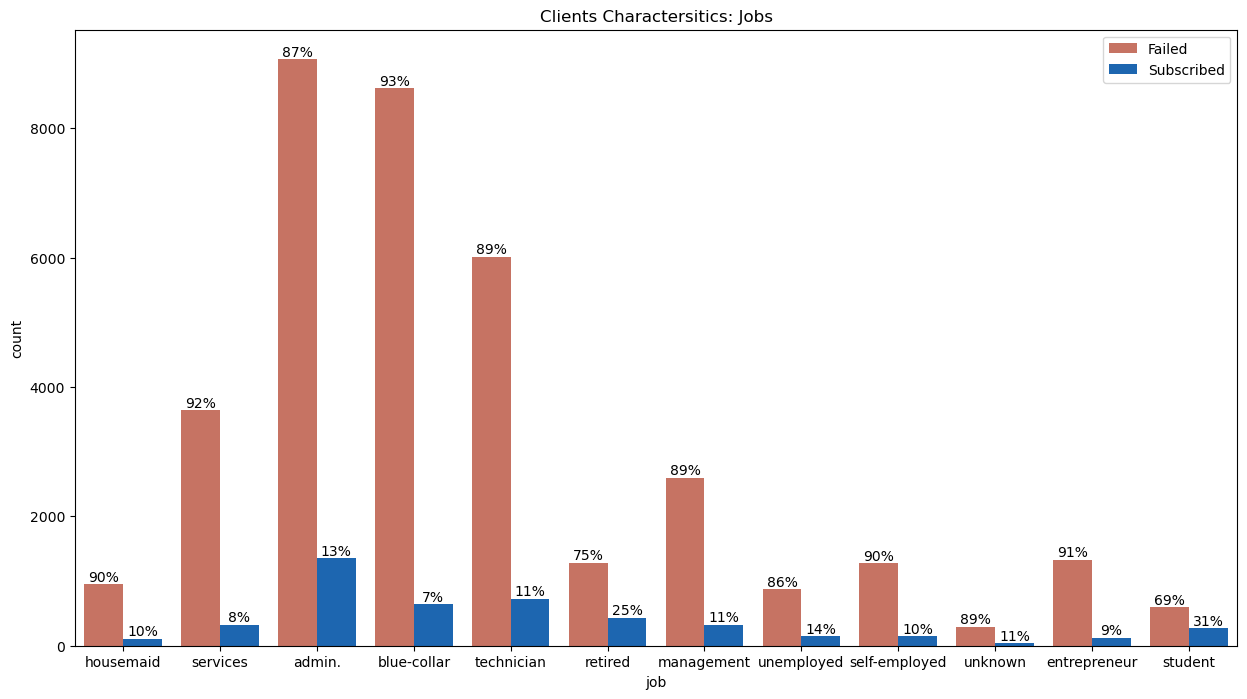

In [26]:
plt.figure(figsize=(15,8))
z = sns.countplot(x="job", hue="y", data=df, palette=['#D66853',"#0466C8"])
z.legend(['Failed', 'Subscribed'])
barPerc(df,'job',z,"Clients Charactersitics: Jobs" )

>- Success rate (rate subscription) vs Age

[Text(0, 0.5, 'y%')]

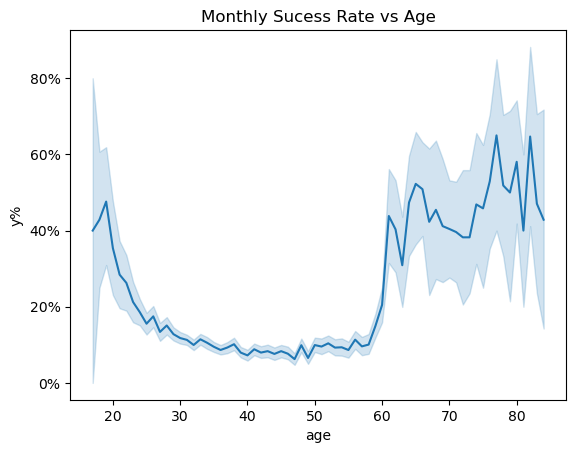

In [27]:
df_temp2 = df[df.age< 85]
ax1 = sns.lineplot(data=df_temp2, x="age", y="y")
ax1.axes.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax1.set_title('Monthly Sucess Rate vs Age')
ax1.set( ylabel='y%')

### 1.4 Handling Missing Values

After having a better perspective of the variables we can focused on how to handle missing values

Just as reminder, the variables with missing values are the following:

In [28]:
# table of missing values
val_table_missing[:6]

,Values Missing,% of Total Values
default,8597,20.9
education,1731,4.2
housing,990,2.4
loan,990,2.4
job,330,0.8
marital,80,0.2


#### default

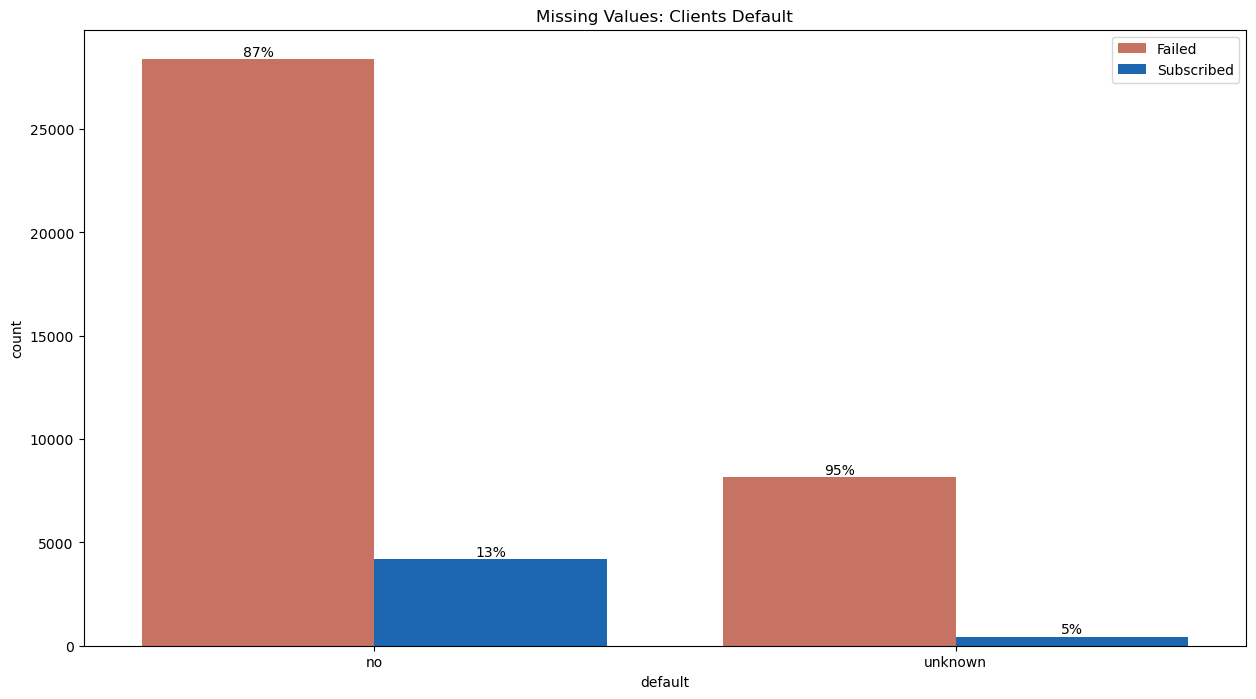

In [29]:
df_default = df[df.default != 'yes']
plt.figure(figsize=(15,8))
z = sns.countplot(x="default", hue="y", data=df_default,palette=['#D66853',"#0466C8"])
z.legend(['Failed', 'Subscribed'])
barPerc(df_default,'default',z, "Missing Values: Clients Default")

Difference in success between the unknown and no values. The value "yes" has only 3 values all of them are no.

In [30]:
df_missing.default = df.default

#### Education

In this case unkown has a success rate similar to university.degree as we can see in the EDA. university.degree
is the mode of the sample ->  Input the null values using university.degree

In [31]:
df_missing.education.fillna(df_missing.education.mode().iloc[0], inplace = True)

#### Housing

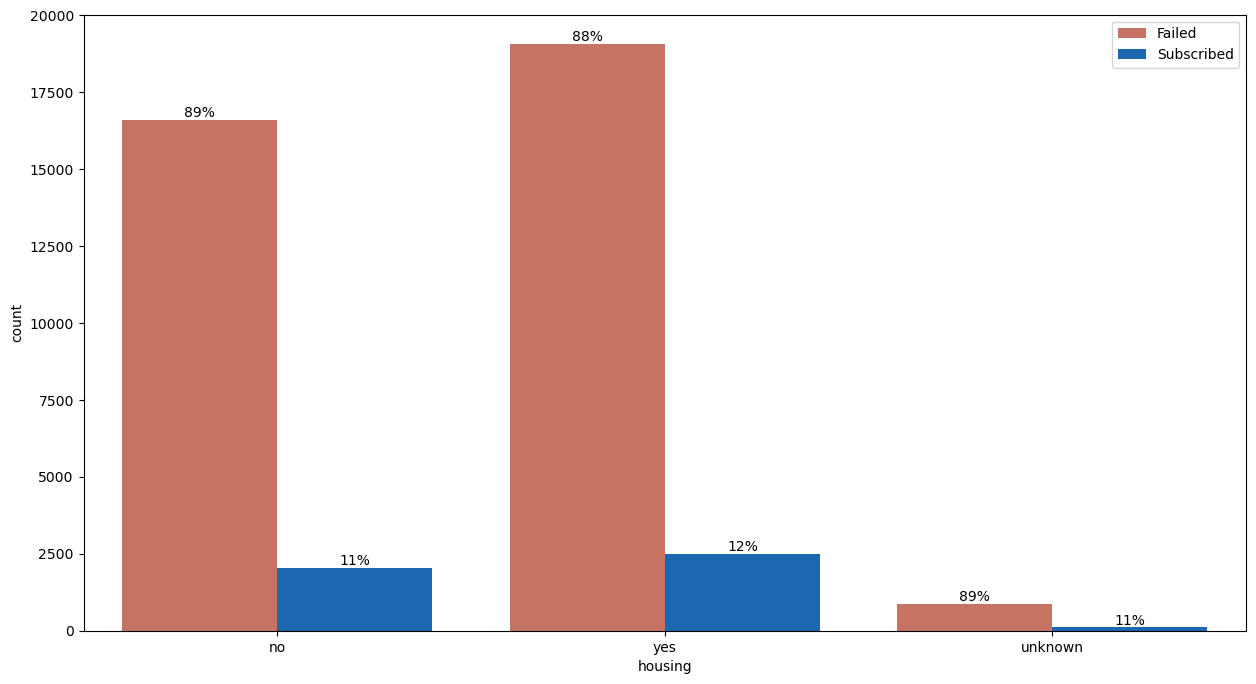

In [32]:
plt.figure(figsize=(15,8))
z = sns.countplot(x="housing", hue="y", data=df,palette=['#D66853',"#0466C8"])
z.legend(['Failed', 'Subscribed'])
barPerc(df_default,'housing',z,"" )

There is no considerable difference between clients with house, without, or with unkown variable.
-> Input using the mode

In [33]:
df_missing.housing.fillna(df_missing.housing.mode().iloc[0], inplace = True)

#### Loan

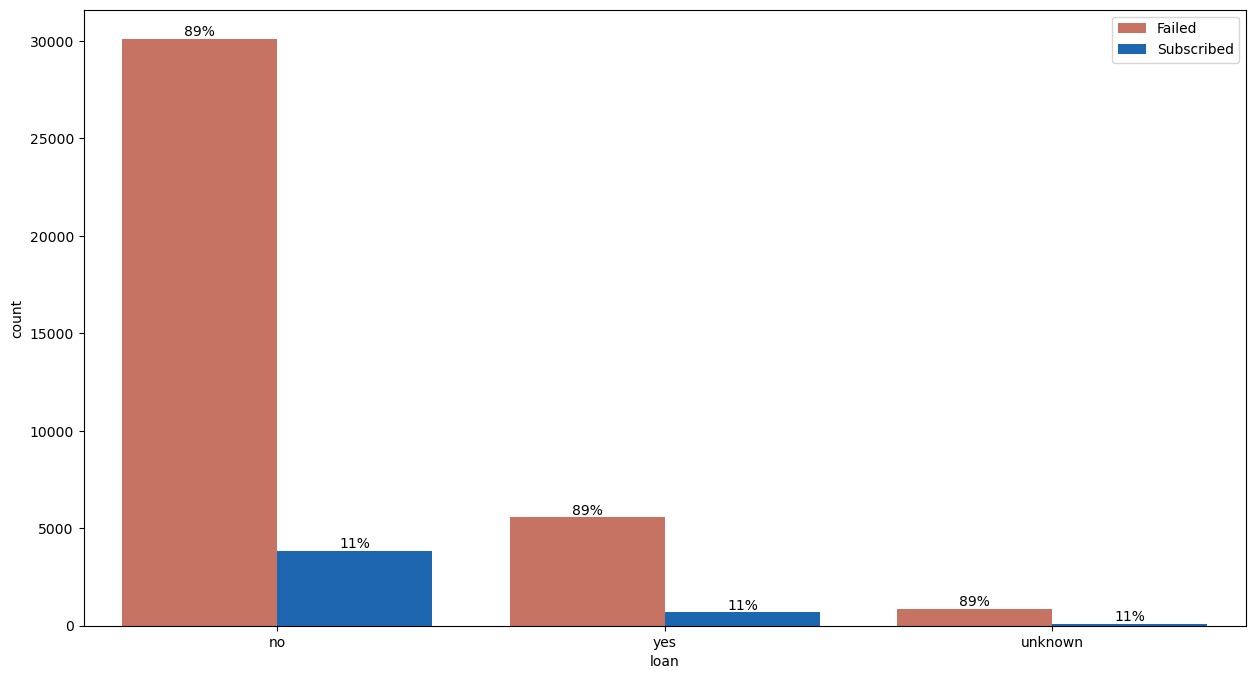

In [34]:
plt.figure(figsize=(15,8))
z = sns.countplot(x="loan", hue="y", data=df,palette=['#D66853',"#0466C8"])
z.legend(['Failed', 'Subscribed'])
barPerc(df_default,'loan',z,"")

Same as previous case. There is no considerable difference -> Input using the most frequent variable

In [35]:
df_missing.loan.fillna(df_missing.loan.mode().iloc[0], inplace = True)

#### Job and marital status

For the case of Jobs and marital status. The unkowns are fewer than 1%.-> remove those rows from dataset.

In [36]:
df_missing = df_missing[(df_missing.job.notna()) & (df_missing.marital.notna())]

## 2. Feature Engineering

1. Remove day of the week variable. There is no considerable variability given day vs output variable

In [37]:
df_missing = df_missing.drop(['day_of_week'], axis = 1)

2. Transform pdays (number of days since last contact) to a binary variable. Contacted or not. Because of two reasons:
-1 most datapoint are 999 which means person was never contacted. Additionaly the other values have a very narrow
variablity. Between 2 and 12 days.

In [38]:
# df_missing['pdays_binary'] = df_missing.pdays != 999
# df_missing = df_missing.drop(['pdays'], axis = 1)

3. One-hot econding

In [39]:
columns = df_missing.select_dtypes(include = [object]).columns
df_missing = pd.concat([df_missing, pd.get_dummies(df_missing[columns],drop_first=True)], axis = 1)
df_missing = df_missing.drop(['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'duration', 'poutcome',
                              'y']
                            ,axis = 1)

In [40]:
 df_final = df_missing 

In [41]:
 df_final

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,0,0,1,0,0,1,0,1
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,0,0,1,0,0,1,0,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,0,0,1,0,0,1,0,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,0,0,1,0,0,1,0,1


In [42]:

y = df_final[['y_yes']]
df_final = df_final.iloc[:,df_final.columns != 'y_yes']

## 3. Statistical Modeling

Given that this is a classification problem with two options (binary: yes or no subscription) . 
We focused on the next models: Logistic Regression (including regularized Lasso), Random Forest, k-nearest neighbor 

Split in training and testing modelsm

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_final , y, test_size = 0.2, random_state = 42, stratify = y)

Normalize.Normalize fiting on the training set and not in the whole data set to avoid data leakage (using data outside of the training set, which would degrade the realibility of our results

In [44]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)


Resampling: Given that the problem is imbalanced. We will train the models with two training data sets, the original umbalancend and one modified by ressmple

In [45]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler(sampling_strategy='minority')


# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)


In [46]:
y_over.sum()

y_yes    28954
dtype: int64

Now we are ready to apply the models. We will use 3 models. Logistic Regression, Knn, and Random Forest

### 3.1 Models using imbalanced data

#### 3.1.1 Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(random_state=1)
model_logistic.fit(X_train, y_train)
y_pred = model_logistic.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
new_report_logistic = pd.DataFrame(report).transpose()
new_report_logistic = new_report_logistic.iloc[1:3,:2]

C:\Users\Francisco\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Francisco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(Reached limit warning will be solved by the regularized version. Lasso Logistic Regression)

In [48]:

new_report_logistic['AUC']= roc_auc_score(y_test, y_pred)
new_report_logistic = new_report_logistic[:1]

In [49]:
new_report_logistic = new_report_logistic.rename(index={'1': 'Logistic Regression'})

new_report_logistic

,precision,recall,AUC
Logistic Regression,0.690391,0.211099,0.59954


#### 3.1.2 Lasso Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegressionCV

# define model
model_logistic_lasso = LogisticRegressionCV(penalty='l1',cv=5, random_state=1, solver='liblinear',
                                            Cs= [10, 1, .1]).fit(X_train, y_train.values.ravel())
# fit model
model_logistic_lasso.fit(X_train, y_train.values.ravel())

LogisticRegressionCV(Cs=[10, 1, 0.1], cv=5, penalty='l1', random_state=1,
                     solver='liblinear')

In [51]:
y_pred = model_logistic_lasso.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

new_report_logistic_lasso = pd.DataFrame(report).transpose()
new_report_logistic_lasso = new_report_logistic_lasso.iloc[1:3,:2]

In [52]:

new_report_logistic_lasso['AUC']= roc_auc_score(y_test, y_pred)
new_report_logistic_lasso = new_report_logistic_lasso[:1]
new_report_logistic_lasso = new_report_logistic_lasso.rename(index={'1': 'Logistic Lasso Regression'})

new_report_logistic_lasso

,precision,recall,AUC
Logistic Lasso Regression,0.695341,0.211099,0.599679


#### 3.1.3 K Nearest Neighbor

([<matplotlib.axis.XTick at 0x14a272c3250>,
 <a list of 19 Text major ticklabel objects>)

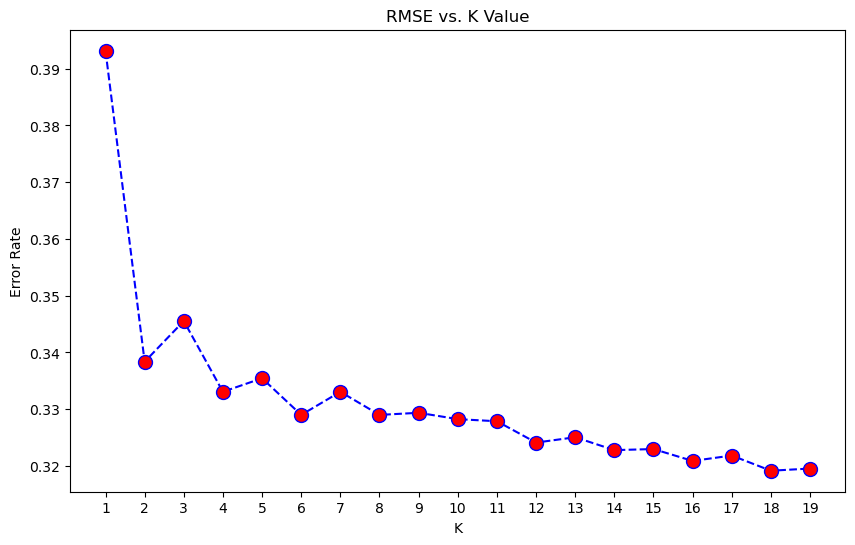

In [53]:
from matplotlib.ticker import MaxNLocator
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error 
from math import sqrt


rmse_val  = []
error_rate = []
for i in range(1,20):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train.values.ravel())
 pred_i = knn.predict(X_test)
 error = sqrt(mean_squared_error(y_test,pred_i ))
 rmse_val.append(error) #store rmse values
 

plt.figure(figsize=(10,6))
plt.plot(range(1,20),rmse_val,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('RMSE vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(range(1,20))


Selected K=6 after that the error rate reduction starts to hover and doesn't change considerably

In [54]:

model_knn = KNeighborsClassifier(n_neighbors=6)
model_knn.fit(X_train, y_train.values.ravel())
y_pred = model_knn.predict(X_test)

In [55]:
report = classification_report(y_test, y_pred, output_dict=True)
new_report_knn = pd.DataFrame(report).transpose()
new_report_knn = new_report_knn.iloc[1:3,:2]

In [56]:

new_report_knn['AUC']= roc_auc_score(y_test, y_pred)
new_report_knn = new_report_knn[:1]

In [57]:
new_report_knn = new_report_knn.rename(index={'1': 'KNN'})

new_report_knn

,precision,recall,AUC
KNN,0.553571,0.202394,0.590836


#### 3.1.4 Random forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Random state 
randomforest = RandomForestClassifier(random_state = 1)


In [59]:

# number of trees. Reduced the number of trees to improve speed. (It didn't have better resuts with bigger numbers)
n_estimators = [5]  
max_depth = [10, 20]

#complexity. Reduced the number to improve speed. We finally chose the model applied to the balanced dataset
min_samples_split = [ 15, 25]
min_samples_leaf = [ 10, 30] 



hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(randomforest, hyperF, cv = 5, verbose = 2, 
                      n_jobs = -1)
model_random_forest = gridF.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [60]:
y_pred = model_random_forest.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
new_report_randomforest = pd.DataFrame(report).transpose()
new_report_randomforest = new_report_randomforest.iloc[1:3,:2]

In [61]:

new_report_randomforest['AUC']= roc_auc_score(y_test, y_pred)
new_report_randomforest = new_report_randomforest[:1]

In [62]:

new_report_randomforest = new_report_randomforest.rename(index={'1': 'Random Forest'})

new_report_randomforest

,precision,recall,AUC
Random Forest,0.704797,0.207835,0.598392


Next we run the models using balanced data. Which provided better results for our main objective achieving better recall.

### 3.2 Models using balanced data (Results Shown in  Report)

#### 3.2.1 Balanced Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

model_logistic_b = LogisticRegression(random_state=1)
model_logistic_b.fit(X_over, y_over.values.ravel())
y_pred = model_logistic_b.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
new_report_logistic_b = pd.DataFrame(report).transpose()
new_report_logistic_b = new_report_logistic_b.iloc[1:3,:2]

C:\Users\Francisco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(Reached limit warning will be solved by the regularized version. Lasso Logistic Regression)

In [64]:

new_report_logistic_b['AUC']= roc_auc_score(y_test, y_pred)
new_report_logistic_b = new_report_logistic_b[:1]
new_report_logistic_b = new_report_logistic_b.rename(index={'1': 'Logistic Regression - Balanced'})

new_report_logistic_b

,precision,recall,AUC
Logistic Regression - Balanced,0.360202,0.622416,0.741032


Text(0.5, 1.0, 'Feature Importance (absolute value coefficients)')

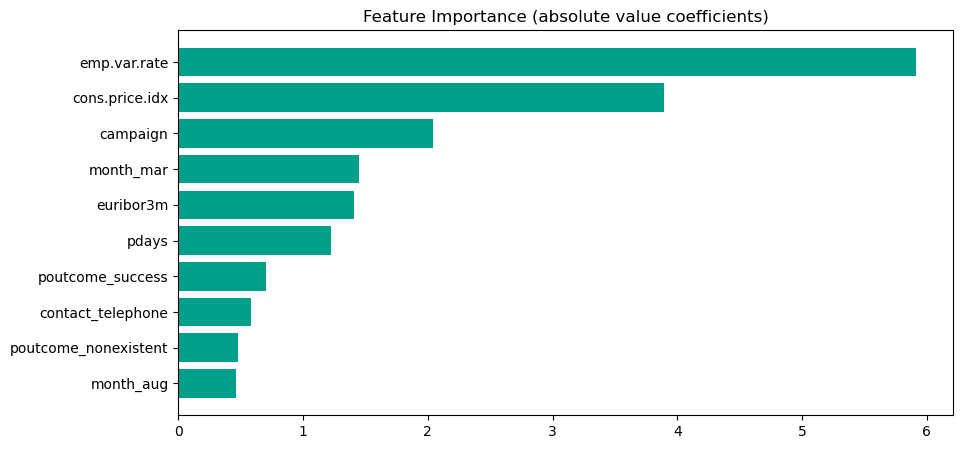

In [65]:
# Coefficients are in log odds 
feature_importance=pd.DataFrame({'feature':list(X_train.columns),'feature_importance':[ abs(x) for x in model_logistic_b.coef_[0]]})
imp = feature_importance.sort_values('feature_importance',ascending=True)[-10:]

plt.figure(figsize=(10,5))
plt.barh(imp['feature'], imp['feature_importance'], color = ['#009f8b'])
plt.title('Feature Importance (absolute value coefficients)')


#### 3.2.2 Balanced Lasso Logistic Regression

In [66]:
# define model
model_logistic_lasso_b = LogisticRegressionCV(penalty='l1',cv=5, random_state=1, solver='liblinear',
                                            Cs= [100,10, 1]).fit(X_over, y_over.values.ravel())
# fit model
model_logistic_lasso_b.fit(X_over, y_over.values.ravel())

LogisticRegressionCV(Cs=[100, 10, 1], cv=5, penalty='l1', random_state=1,
                     solver='liblinear')

In [67]:
y_pred = model_logistic_lasso_b.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

new_report_logistic_lasso_b = pd.DataFrame(report).transpose()
new_report_logistic_lasso_b = new_report_logistic_lasso_b.iloc[1:3,:2]

In [68]:

new_report_logistic_lasso_b['AUC']= roc_auc_score(y_test, y_pred)
new_report_logistic_lasso_b = new_report_logistic_lasso_b[:1]
new_report_logistic_lasso_b = new_report_logistic_lasso_b.rename(index={'1': 'Logistic Lasso Regression - Balanced'})

new_report_logistic_lasso_b

,precision,recall,AUC
Logistic Lasso Regression - Balanced,0.360656,0.622416,0.741171


Text(0.5, 1.0, 'Feature Importance (absolute value coefficients)')

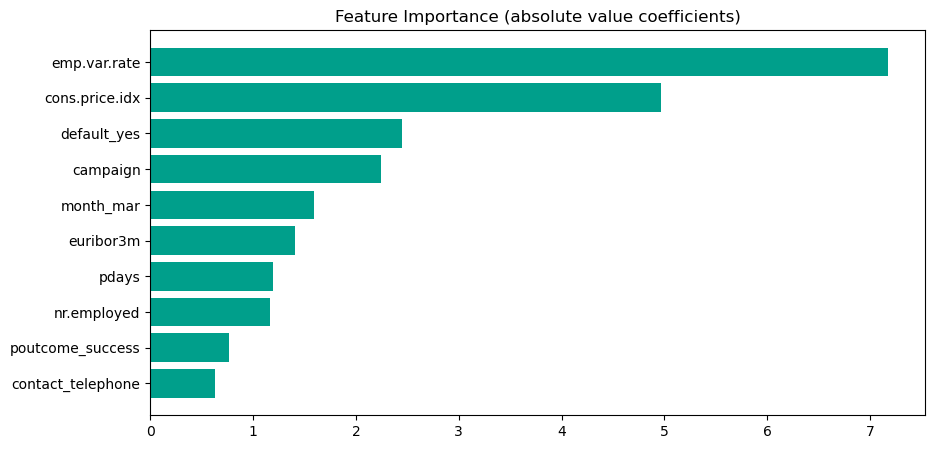

In [69]:
# Coefficients are in log odds 
feature_importance=pd.DataFrame({'feature':list(X_train.columns),'feature_importance':[ abs(x) for x in model_logistic_lasso_b.coef_[0]]})
imp = feature_importance.sort_values('feature_importance',ascending=True)[-10:]

plt.figure(figsize=(10,5))
plt.barh(imp['feature'], imp['feature_importance'], color = ['#009f8b'])
plt.title('Feature Importance (absolute value coefficients)')

In [70]:
# Coefficients are in log odds 
feature_importance=pd.DataFrame({'feature':list(X_train.columns),'feature_importance':[ x for x in model_logistic_lasso_b.coef_[0]]})



# if needed list of feature importance and their value (list is very big to print)
feature_importance.sort_values('feature_importance',ascending=True);

#### 3.2.3 Balanced KNN

In [71]:
# with GridSearch - Assume the neighbors near 6 cluster that we found previously in the unbalanced data


parameters_KNN = {
    'n_neighbors': [5,6,7],
    'weights':['uniform','distance']}

model_knn_b = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=parameters_KNN,
    n_jobs = -1,
    cv = 5,
    verbose = 2,
    scoring = 'accuracy'
)

model_knn_b.fit(X_train, y_train.values.ravel())
y_pred = model_knn_b.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
new_report_knn_b = pd.DataFrame(report).transpose()
new_report_knn_b = new_report_knn_b.iloc[1:3,:2]


new_report_knn_b['AUC']= roc_auc_score(y_test, y_pred)
new_report_knn_b = new_report_knn_b[:1]

new_report_knn_b = new_report_knn_b.rename(index={'1': 'KNN - Balanced'})

new_report_knn_b

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,precision,recall,AUC
KNN - Balanced,0.553571,0.202394,0.590836


#### 3.2.4 Balanced Random Forest

In [72]:

# number of trees: reduced the amouth of trees to increase speed without affecting the performance metrics.
n_estimators = [25]  
max_depth = [5 ,10, 20]

#complexity
min_samples_split = [ 15, 25]

# removed some of the options to increase speed, while keeping similar results
min_samples_leaf = [ 10, 30] 

randomforest = RandomForestClassifier(random_state = 1)

hyperF = dict(n_estimators = n_estimators,  max_depth = max_depth,
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(randomforest, hyperF, cv = 5, verbose = 2, 
                      n_jobs = -1)
model_random_forest_b = gridF.fit(X_over, y_over.values.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [73]:
y_pred = model_random_forest_b.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
new_report_randomforest_b= pd.DataFrame(report).transpose()
new_report_randomforest_b = new_report_randomforest_b.iloc[1:3,:2]

In [74]:

new_report_randomforest_b['AUC']= roc_auc_score(y_test, y_pred)
new_report_randomforest_b = new_report_randomforest_b[:1]

In [75]:

new_report_randomforest_b = new_report_randomforest_b.rename(index={'1': 'Random Forest - Balanced'})

new_report_randomforest_b

,precision,recall,AUC
Random Forest - Balanced,0.404971,0.602829,0.745191


In [76]:
# import permutation_importance to calculate feature importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model_random_forest_b , X_test, y_test)

The permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease.

Text(0.5, 1.0, 'Permutation Feature Importance')

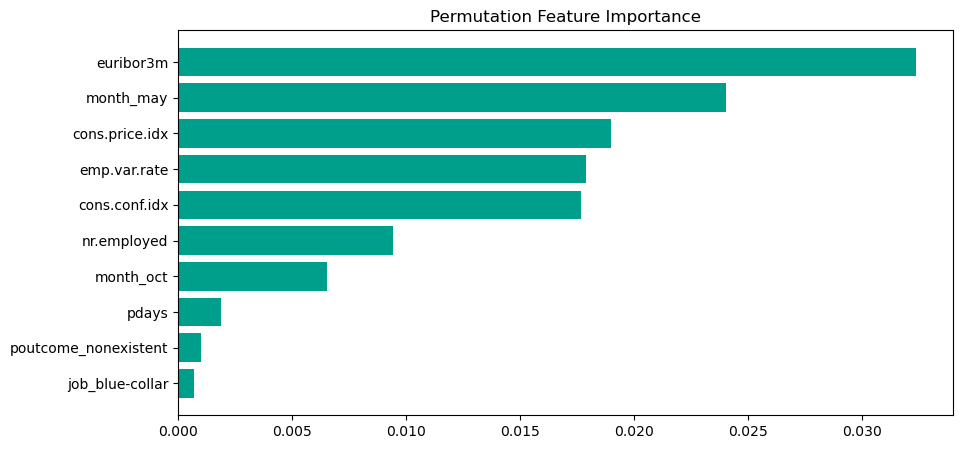

In [77]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,5))
plt.barh(df_final.columns[sorted_idx][-10:], perm_importance.importances_mean[sorted_idx][-10:], color = ['#009f8b'])

plt.title('Permutation Feature Importance')


## 4. Final Table

#### 4.1 Imbalanced Data Set (original data)

Models that used imbalanced data have a very poor recall. Basically, they just predict that customers will not subscribe. 
(It is not information useful for the report, it was ommited)

In [78]:
comparison =pd.concat([new_report_logistic, new_report_logistic_lasso,new_report_knn,new_report_randomforest], axis = 0)

In [79]:
comparison

,precision,recall,AUC
Logistic Regression,0.690391,0.211099,0.599540
Logistic Lasso Regression,0.695341,0.211099,0.599679
KNN,0.553571,0.202394,0.590836
Random Forest,0.704797,0.207835,0.598392


#### 4.1 Balanced Data Set 

In [80]:
comparison_balanced = pd.concat([new_report_logistic_b, new_report_logistic_lasso_b, new_report_knn_b,new_report_randomforest_b], axis = 0)

In [81]:
comparison_balanced.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2px solid green')]}])

,precision,recall,AUC
Logistic Regression - Balanced,0.360202,0.622416,0.741032
Logistic Lasso Regression - Balanced,0.360656,0.622416,0.741171
KNN - Balanced,0.553571,0.202394,0.590836
Random Forest - Balanced,0.404971,0.602829,0.745191


The balanced model provides better results on recall. Which is the most important factor. Acquiring more clients